In [1]:
# Import dependencies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import requests
import time
import json
import csv

In [2]:
# Import CSV file
path = "college_data.csv"
college_data = pd.read_csv(path, encoding='utf-8')
college_data_df = pd.DataFrame(college_data)
college_data_df.head()

,Year,College_names,College_state,In_state_tuition,Out_of_state_tuition,Admissions_rate_overall,Enrollment,Student Size
0,2002,"""Washington State University""","""WA""",4520,12270,0.7708,5100,4406
1,2003,"""Washington State University""","""WA""",5280,13382,0.7798,6037,4590
2,2004,"""Washington State University""","""WA""",5628,14046,0.7529,5368,4728
3,2005,"""Washington State University""","""WA""",5980,14985,0.7389,22177,19078
4,2006,"""Washington State University""","""WA""",6448,16088,0.7706,22444,18995


In [3]:
college_df_sorted = college_data_df.sort_values(["College_names","Year"],ascending = (True))

In [4]:
del college_df_sorted['Enrollment']
college_df_sorted

,Year,College_names,College_state,In_state_tuition,Out_of_state_tuition,Admissions_rate_overall,Student Size
34,2002,"""Arizona State University-Tempe""","""AZ""",2585,11105,0.8474,35573
35,2003,"""Arizona State University-Tempe""","""AZ""",3595,12115,0.8840,37336
36,2004,"""Arizona State University-Tempe""","""AZ""",4064,12919,0.8610,38117
37,2005,"""Arizona State University-Tempe""","""AZ""",4406,15095,0.9102,39649
38,2006,"""Arizona State University-Tempe""","""AZ""",4688,15847,0.9242,38984
...,...,...,...,...,...,...,...
12,2014,"""Washington State University""","""WA""",12428,25510,0.8208,23585
13,2015,"""Washington State University""","""WA""",11967,25567,0.7964,24100
14,2016,"""Washington State University""","""WA""",11041,25673,0.7204,24362
15,2017,"""Washington State University""","""WA""",11391,25817,0.7306,24797


In [9]:
college_df_sorted = college_df_sorted.rename(columns={'Student Size': 'Student_size'})


college_df_sorted['%_In_state_chng'] =college_df_sorted.groupby('College_names').In_state_tuition.pct_change()
college_df_sorted['%_Out_of_state_chng'] =college_df_sorted.groupby('College_names').Out_of_state_tuition.pct_change()
college_df_sorted['%_admissions_rate_chng'] =college_df_sorted.groupby('College_names').Admissions_rate_overall.pct_change()
college_df_sorted['%_Student_size_chng'] =college_df_sorted.groupby('College_names').Student_size.pct_change()

college_df_sorted.head(15)


,Year,College_names,College_state,In_state_tuition,Out_of_state_tuition,Admissions_rate_overall,Student_size,%_In_state_chng,%_Out_of_state_chng,%_admissions_rate_chng,%_Student_size_chng
34,2002,"""Arizona State University-Tempe""","""AZ""",2585,11105,0.8474,35573,NaN,NaN,NaN,NaN
35,2003,"""Arizona State University-Tempe""","""AZ""",3595,12115,0.8840,37336,0.390716,0.090950,0.043191,0.049560
36,2004,"""Arizona State University-Tempe""","""AZ""",4064,12919,0.8610,38117,0.130459,0.066364,-0.026018,0.020918
37,2005,"""Arizona State University-Tempe""","""AZ""",4406,15095,0.9102,39649,0.084154,0.168434,0.057143,0.040192
38,2006,"""Arizona State University-Tempe""","""AZ""",4688,15847,0.9242,38984,0.064004,0.049818,0.015381,-0.016772
39,2007,"""Arizona State University-Tempe""","""AZ""",4971,17003,0.9242,38597,0.060367,0.072948,0.000000,-0.009927
40,2008,"""Arizona State University-Tempe""","""AZ""",5661,17949,0.8206,52883,0.138805,0.055637,-0.112097,0.370132
41,2009,"""Arizona State University-Tempe""","""AZ""",6844,19629,0.9034,53902,0.208974,0.093599,0.100902,0.019269
42,2010,"""Arizona State University-Tempe""","""AZ""",8132,20596,0.9050,56232,0.188194,0.049264,0.001771,0.043227
43,2011,"""Arizona State University-Tempe""","""AZ""",9720,22319,0.8664,58184,0.195278,0.083657,-0.042652,0.034713


## Start graphing !!!

In [27]:
# Import CSV for 
path = "app_and_adm_data.csv"
admin_data = pd.read_csv(path, encoding='utf-8')
admin_data_df = pd.DataFrame(admin_data)
admin_data_df

,Unnamed: 0,College_names,Year,applicants_total,applicants_men,applicants_women,admissions_total,admissions_men,admissions_women,% applicants change,% admissions_change,applications_vs_admissions
0,204,Arizona State University-Tempe,2001,20861,10072,10789,15702,7385,8317,NaN,NaN,-5159
1,192,Arizona State University-Tempe,2002,18155,8423,9732,15385,6979,8406,-0.129716,-0.020189,-2770
2,180,Arizona State University-Tempe,2003,19785,9192,10593,17490,7949,9541,0.089782,0.136822,-2295
3,168,Arizona State University-Tempe,2004,20789,9639,11150,17899,8129,9770,0.050746,0.023385,-2890
4,156,Arizona State University-Tempe,2005,19914,9398,10516,18126,8394,9732,-0.042090,0.012682,-1788
...,...,...,...,...,...,...,...,...,...,...,...,...
211,59,Washington State University,2014,14887,6760,8127,12219,5403,6816,0.000000,0.000000,-2668
212,47,Washington State University,2015,19766,8594,11172,15742,6658,9084,0.327736,0.288321,-4024
213,35,Washington State University,2016,23223,9716,13507,16731,6736,9995,0.174896,0.062826,-6492
214,23,Washington State University,2017,22565,9416,13149,16487,6766,9721,-0.028334,-0.014584,-6078


In [30]:
clean_admin_df = admin_data_df.loc[(admin_data_df['Year'] >= 2002) &
                                   (admin_data_df['Year'] <= 2018)
                                  ]
clean_admin_df

,Unnamed: 0,College_names,Year,applicants_total,applicants_men,applicants_women,admissions_total,admissions_men,admissions_women,% applicants change,% admissions_change,applications_vs_admissions
1,192,Arizona State University-Tempe,2002,18155,8423,9732,15385,6979,8406,-0.129716,-0.020189,-2770
2,180,Arizona State University-Tempe,2003,19785,9192,10593,17490,7949,9541,0.089782,0.136822,-2295
3,168,Arizona State University-Tempe,2004,20789,9639,11150,17899,8129,9770,0.050746,0.023385,-2890
4,156,Arizona State University-Tempe,2005,19914,9398,10516,18126,8394,9732,-0.042090,0.012682,-1788
5,144,Arizona State University-Tempe,2006,20702,10093,10609,19133,9169,9964,0.039570,0.055556,-1569
...,...,...,...,...,...,...,...,...,...,...,...,...
211,59,Washington State University,2014,14887,6760,8127,12219,5403,6816,0.000000,0.000000,-2668
212,47,Washington State University,2015,19766,8594,11172,15742,6658,9084,0.327736,0.288321,-4024
213,35,Washington State University,2016,23223,9716,13507,16731,6736,9995,0.174896,0.062826,-6492
214,23,Washington State University,2017,22565,9416,13149,16487,6766,9721,-0.028334,-0.014584,-6078


In [45]:
# Sort
group_coll_df = clean_admin_df.groupby(['College_names','Year']).mean()
group_coll_df.head(15)
# Application % change over time (2002-2018)

# Assign variables
#time = 


Unnamed: 0  applicants_total  \
College_names                  Year                                 
Arizona State University-Tempe 2002         192             18155   
                               2003         180             19785   
                               2004         168             20789   
                               2005         156             19914   
                               2006         144             20702   
                               2007         132             20702   
                               2008         120             24922   
                               2009         108             27089   
                               2010          96             28304   
                               2011          84             29771   
                               2012          72             29722   
                               2013          60             21770   
                               2014          48             22581   
                               2015          36             25380   
                               2016          24             24764   

                                     applicants_men  applicants_women  \
College_names                  Year                                     
Arizona State University-Tempe 2002            8423              9732   
                               2003            9192             10593   
                               2004            9639             11150   
                               2005            9398             10516   
                               2006           10093             10609   
                               2007           10093             10609   
                               2008           11953             12969   
                               2009           12955             14134   
                               2010           13807             14497   
                               2011           14512             15259   
                               2012           14661             15061   
                               2013           11822              9948   
                               2014           12092             10489   
                               2015           13898             11482   
                               2016           13514             11250   

                                     admissions_total  admissions_men   \
College_names                  Year                                      
Arizona State University-Tempe 2002             15385             6979   
                               2003             17490             7949   
                               2004             17899             8129   
                               2005             18126             8394   
                               2006             19133             9169   
                               2007             19133             9169   
                               2008             23504            11081   
                               2009             24473            11530   
                               2010             25616            12235   
                               2011             25795            12339   
                               2012             26425            12755   
                               2013             17465             9292   
                               2014             19042            10124   
                               2015             21042            11341   
                               2016             20431            10961   

                                     admissions_women  % applicants change  \
College_names                  Year                                          
Arizona State University-Tempe 2002              8406            -0.129716   
                               2003              9541             0.089782   
                               2004              9

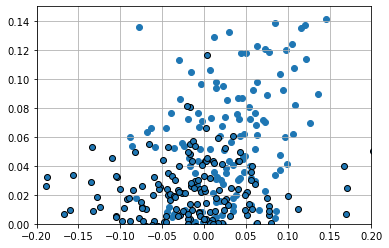

In [46]:
# In state vs Out of state scatterplot and regressions

# Use scatter plot to graph

# Set columns as variables for axis
x_axis = group_coll_df['% admissions_change']
y_axis = group_coll_df['% applicants change']


fig1 = plt.figure()
plt.scatter(x_axis, y_axis)

plt.plot(in_state, out_state, linestyle='none', marker="o", markeredgecolor="black")
# plt.title('In State vs. Out State tuition over time (2002-2018)')
# plt.xlabel("In Satet Tuition (%)")
# plt.ylabel("Out of State Tuition (%)")
plt.ylim(0,0.15)
plt.xlim(-0.2,0.2)
plt.grid()

plt.show()

#fig1.savefig('Outputs/fig1.png')

In [7]:
# Admissions rate overall graph overtime


In [ ]:
# # Use scatter plot to graph

# Set columns as variables for axis
in_state = college_df_sorted['%_admissions_rate_chng']
out_state = college_df_sorted['%_Student_size_chng']


fig1 = plt.figure()
plt.scatter(in_state, out_state)

plt.plot(in_state, out_state, linestyle='none', marker="o", markeredgecolor="black")